<h3>Importation des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h3>Chargement des fichiers CSV et Excel dans un DataFrame

In [2]:
df= pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/urbsrn_2024-02_donnnées_IR.csv", delimiter= ';')
dfT = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/Data_TESS-W_02-2024.csv", delimiter= ';')
df_03_24 = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/urbsrn_2024-03.csv", delimiter= ';')
df_03_24T = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/Data_TESS-W_03_2024.csv", delimiter= ';')
#calcul = pd.ExcelFile("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier excel/Calcul.xlsx")
def_Neb = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/Calcul.csv", delimiter= ';')
dfT_C = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/Data_TESS_CGR_filtrés.csv", delimiter= ';')

C:\Users\delah\AppData\Local\Temp\ipykernel_11172\2234118646.py:6: DtypeWarning: Columns (0,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  def_Neb = pd.read_csv("C:/Users/delah/Travail/M1/S2/Stage Laboratoire M1/Nebulosit-nocturne-Reunion/Fichier csv/Calcul.csv", delimiter= ';')


<h3>Définition des données</h3>

<p>CRGE-4 02-2024

In [3]:
IR_aa03_Avg = df['IR_aa03_Avg'] # Rayonnement infrarouge CRG-4 1 récent
IR_qa03_Avg = df['IR_qa03_Avg'] # Rayonnement infrarouge CRG-4 2 ancien

# Définition du temps
df['DateTime'] = pd.to_datetime(df['day'] + ' ' + df['hour'], dayfirst = True)
Date = df['DateTime']

<p>TESS-W 02-2024

In [4]:
t_amb = dfT['tamb'] # Température ambiante en °C
t_sky = dfT['tsky'] # Température du ciel en °C
p_sky = dfT['psky'] # Puissance du ciel en W/m²

# Définition du temps
dfT['DateTimeT'] = pd.to_datetime(dfT['Day'] + ' ' + dfT['Hour'], dayfirst = True) 
DateT = dfT['DateTimeT']

CRG4 03-2024

In [5]:
IR_aa03_Avg_03_24 = df_03_24['IR_aa03_Avg'] # Rayonnement infrarouge CRG-4 1 récent
IR_qa03_Avg_03_24 = df_03_24['IR_qa03_Avg'] # Rayonnement infrarouge CRG-4 2 ancien

# Définition du temps
df_03_24['DateTime'] = pd.to_datetime(df_03_24['day'] + ' ' + df_03_24['hour'], dayfirst = True)
#df_03_24_time = df_03_24.set_index(df_03_24['DateTime'])
Date_03_24 = df_03_24['DateTime']
#df_03_24_time.head()

TESS-W 03-2024

In [6]:
t_amb_03_24_K = df_03_24T['tamb'] + 273 # Température ambiante en Kelvin
t_sky_03_24_K = df_03_24T['tsky'] + 273 # Température du ciel en Kelvin

# Définition du temps
df_03_24T['DateTime'] = pd.to_datetime(df_03_24T['day'] + ' ' + df_03_24T['hour'], dayfirst = True)
df_03_24T_time = df_03_24T.set_index(df_03_24T['DateTime'])

P_tsky = (5.670374*10**-8)*((df_03_24T['tsky']+273)**4)
df_03_24T.head()

,day,hour,mag,tamb,tsky,tamb nuit,tsky nuit,DateTime
0,01/03/2024,00:00:48,18.69,26.25,9.74,NaN,NaN,2024-03-01 00:00:48
1,01/03/2024,00:01:49,18.69,26.25,9.76,NaN,NaN,2024-03-01 00:01:49
2,01/03/2024,00:02:49,18.68,26.25,9.84,NaN,NaN,2024-03-01 00:02:49
3,01/03/2024,00:03:49,18.68,26.27,9.91,NaN,NaN,2024-03-01 00:03:49
4,01/03/2024,00:04:50,18.67,26.29,9.90,NaN,NaN,2024-03-01 00:04:50


<h3>Affichage des graphes</h3>

Affichage des graphes  pour les CRG4 03-2024 et le TESS-W 03-2024

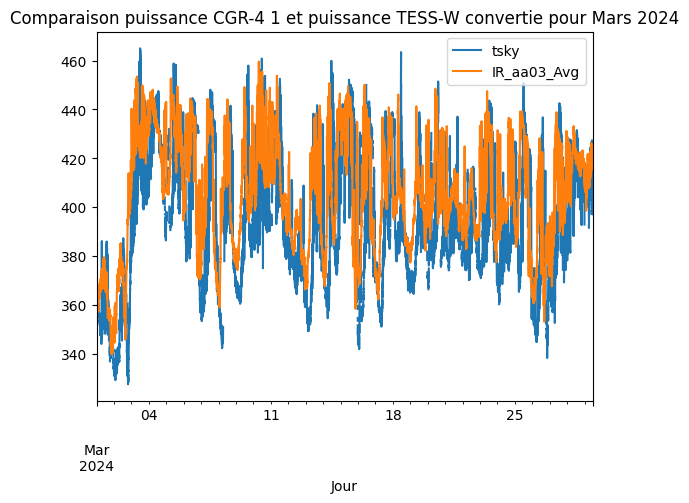

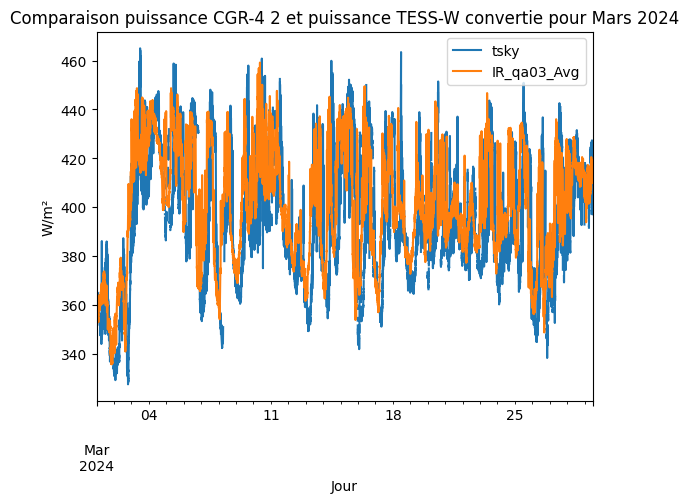

In [7]:
dfT_C['DateTime'] = pd.to_datetime(dfT_C['day'] + ' ' + dfT_C['hour'],  dayfirst = True)
dfT_C.set_index(dfT_C['DateTime'], inplace = True)
P = 5.670374*10**-8*(dfT_C['tsky']+273)**4
P.plot(title='Comparaison puissance CGR-4 1 et puissance TESS-W convertie pour Mars 2024', xlabel='Jour')
dfT_C['IR_aa03_Avg'].plot(xlabel='Jour')
plt.legend()
plt.show()

P.plot()
dfT_C['IR_qa03_Avg'].plot()
plt.title('Comparaison puissance CGR-4 2 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()
plt.show()

In [8]:
MSE = np.mean((P - dfT_C['IR_aa03_Avg'])**2)
RMSE = np.sqrt(np.mean((P - dfT_C['IR_aa03_Avg'])**2))
MAE = np.mean(np.abs(P - dfT_C['IR_aa03_Avg']))
MBE = np.mean(P - dfT_C['IR_aa03_Avg'])
print('Evaluation des données du CGR-4 1 ')
print('MSE =', MSE)
print('RMSE =', RMSE)
print('MAE =', MAE)
print('MBE =', MBE)
print()
MSE = np.mean((P - dfT_C['IR_qa03_Avg'])**2)
RMSE = np.sqrt(np.mean((P - dfT_C['IR_qa03_Avg'])**2))
MAE = np.mean(np.abs(P - dfT_C['IR_qa03_Avg']))
MBE = np.mean(P - dfT_C['IR_qa03_Avg'])
print('Evaluation des données du CGR-4 2 ')
print('MSE =', MSE)
print('RMSE =', RMSE)
print('MAE =', MAE)
print('MBE =', MBE)

Evaluation des données du CGR-4 1 
MSE = 680.1462901421186
RMSE = 26.079614455396356
MAE = 20.513649787854114
MBE = -11.667516689511956

Evaluation des données du CGR-4 2 
MSE = 585.5576015677334
RMSE = 24.19829749316537
MAE = 18.567032350471358
MBE = -6.802353421485831


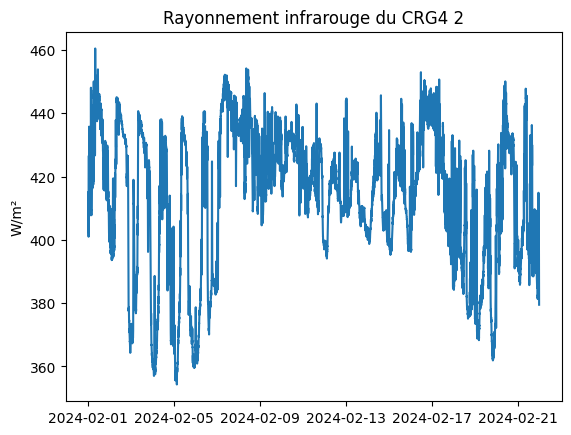

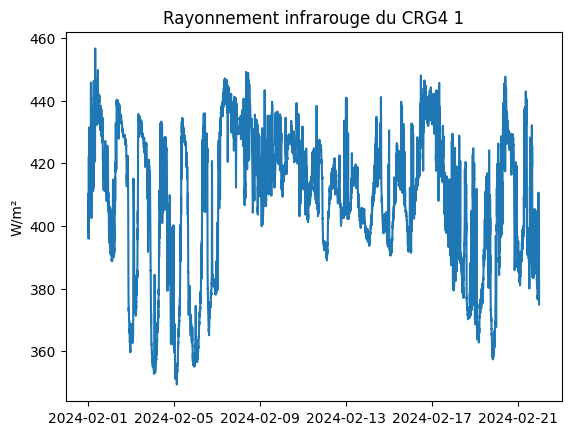

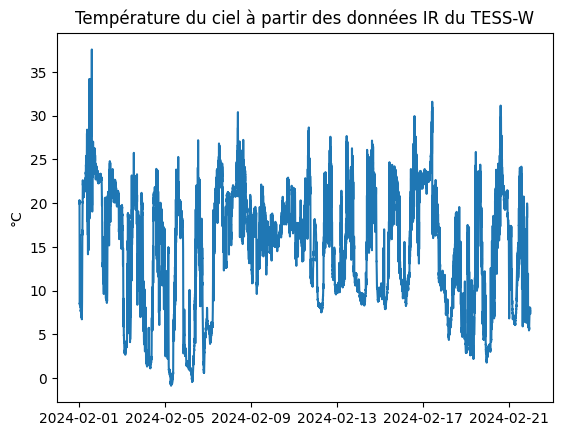

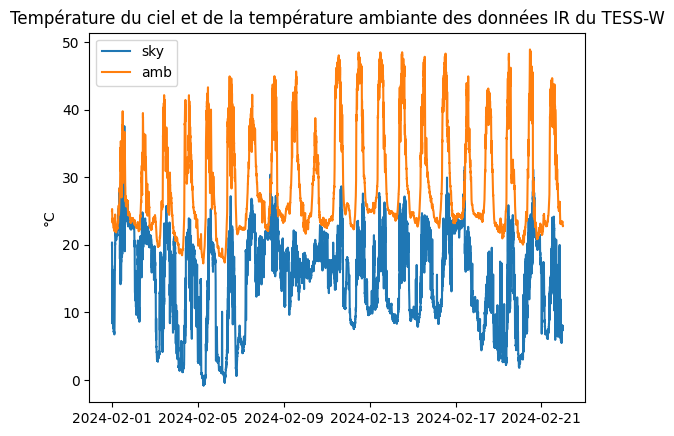

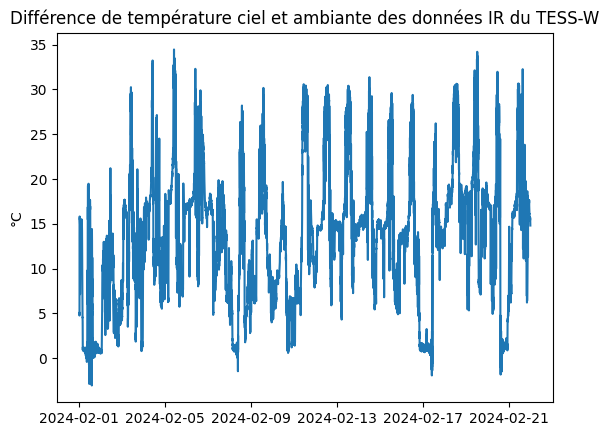

In [9]:
plt.plot(Date, IR_aa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 2')
plt.ylabel('W/m²')
plt.show()

plt.plot(Date, IR_qa03_Avg)
plt.title('Rayonnement infrarouge du CRG4 1')
plt.ylabel('W/m²')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.title('Température du ciel à partir des données IR du TESS-W')
plt.ylabel('°C')
plt.show()

plt.plot(DateT, t_sky, label='sky')
plt.plot(DateT, t_amb, label='amb')
plt.title('Température du ciel et de la température ambiante des données IR du TESS-W')
plt.ylabel('°C')
plt.legend()
plt.show()

plt.plot(DateT, t_amb - t_sky)
plt.title('Différence de température ciel et ambiante des données IR du TESS-W')
plt.ylabel('°C')
plt.show()

<h3>Comparaison GHI-DHI et Température du ciel et ambiante pour Mars 2024 sur certains jours spécifiques</h3>

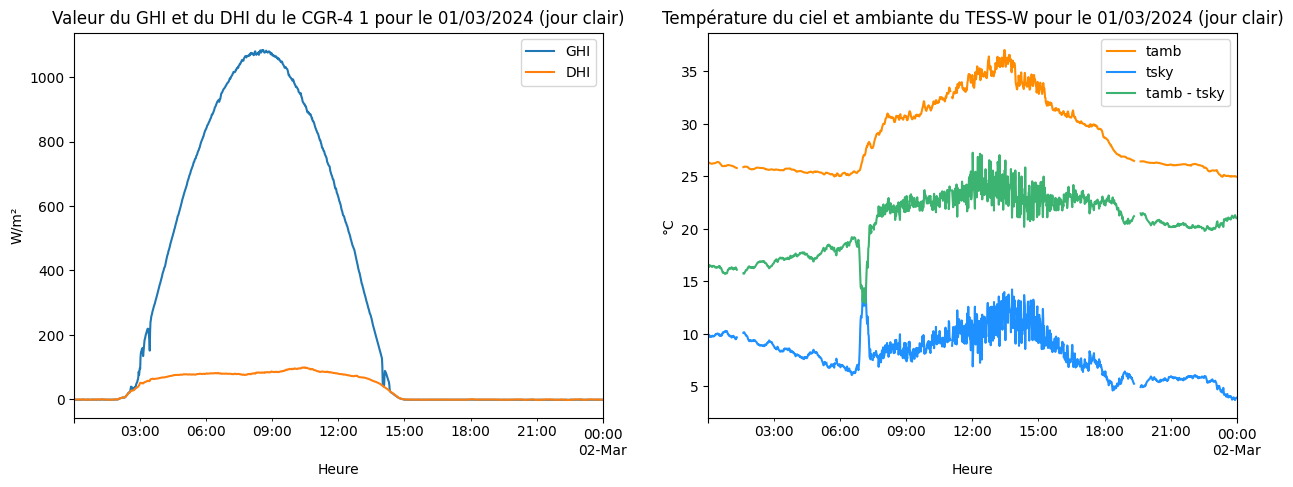

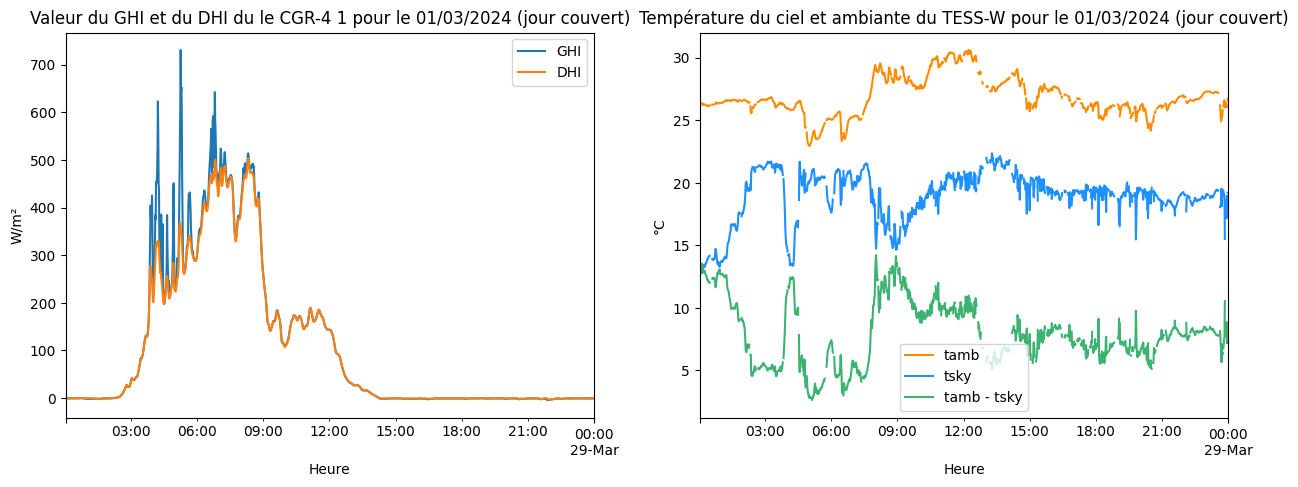

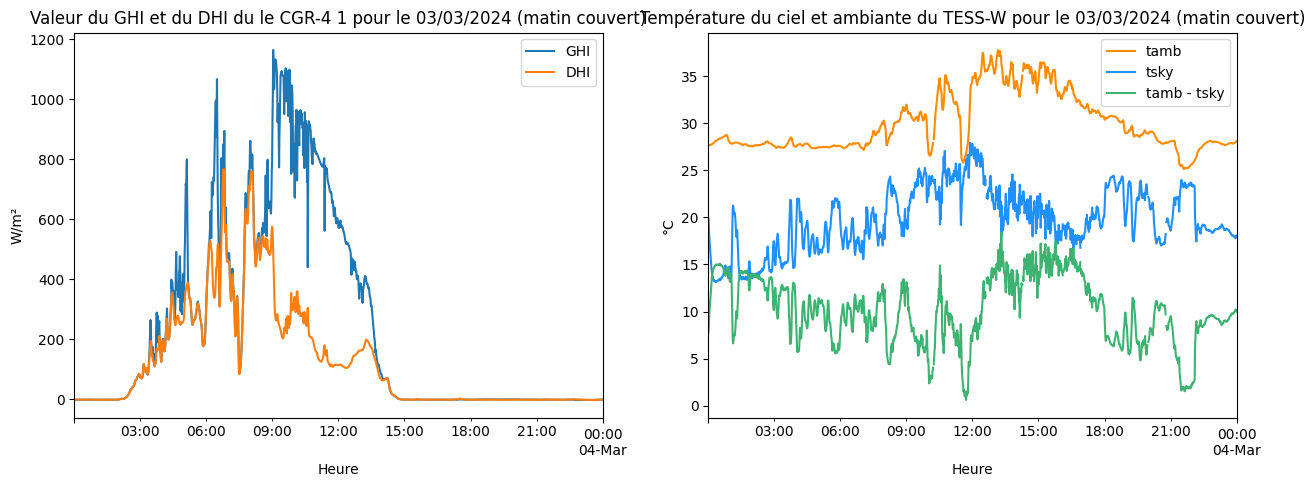

In [94]:
fig, ax1 = plt.subplots(1,2)

dfT_C['GHI_pt03_Avg'][2:1441].plot(ax=ax1[0], figsize=(15,5), label='GHI', title = 'Valeur du GHI et du DHI du le CGR-4 1 pour le 01/03/2024 (jour clair)')
dfT_C['DHI_pu03_Avg'][2:1441].plot(ax=ax1[0], label='DHI', xlabel='Heure', ylabel='W/m²')

dfT_C['tamb'][2:1441].plot(ax=ax1[1], figsize=(15,5), color='darkorange', title = 'Température du ciel et ambiante du TESS-W pour le 01/03/2024 (jour clair)')
dfT_C['tsky'][2:1441].plot(ax=ax1[1], color='dodgerblue')
(dfT_C['tamb'][2:1441]-dfT_C['tsky'][2:1441]).plot(ax=ax1[1], color='mediumseagreen', label='tamb - tsky', xlabel='Heure', ylabel='°C')

ax1[0].legend()
ax1[1].legend()
plt.show()

fig, ax2 = plt.subplots(1,2)

dfT_C['GHI_pt03_Avg'][38882:40321].plot(ax=ax2[0], figsize=(15,5), label='GHI',title = 'Valeur du GHI et du DHI du le CGR-4 1 pour le 01/03/2024 (jour couvert)')
dfT_C['DHI_pu03_Avg'][38882:40321].plot(ax=ax2[0], label='DHI', xlabel='Heure', ylabel='W/m²')

dfT_C['tamb'][38882:40321].plot(ax=ax2[1],figsize=(15,5), color='darkorange', title = 'Température du ciel et ambiante du TESS-W pour le 01/03/2024 (jour couvert)')
dfT_C['tsky'][38882:40321].plot(ax=ax2[1], color='dodgerblue')
(dfT_C['tamb'][38882:40321]-dfT_C['tsky'][38882:40321]).plot(ax=ax2[1], color='mediumseagreen', label='tamb - tsky', xlabel='Heure', ylabel='°C')

ax2[0].legend()
ax2[1].legend()
plt.show()

fig, ax3 = plt.subplots(1,2)

dfT_C['GHI_pt03_Avg'][2882:4321].plot(ax=ax3[0], figsize=(15,5), label='GHI', title = 'Valeur du GHI et du DHI du le CGR-4 1 pour le 03/03/2024 (matin couvert)')
dfT_C['DHI_pu03_Avg'][2882:4321].plot(ax=ax3[0], label='DHI', xlabel='Heure', ylabel='W/m²')

dfT_C['tamb'][2882:4321].plot(ax=ax3[1],figsize=(15,5), color='darkorange',title = 'Température du ciel et ambiante du TESS-W pour le 03/03/2024 (matin couvert)')
dfT_C['tsky'][2882:4321].plot(ax=ax3[1], color='dodgerblue')
(dfT_C['tamb'][2882:4321]-dfT_C['tsky'][2882:4321]).plot(ax=ax3[1], color='mediumseagreen', label='tamb - tsky', xlabel='Heure', ylabel='°C')

ax3[0].legend()
ax3[1].legend()
plt.show()


<h3>Pourcentage Nébulosité nocturne 03-2024

(0.0, 100.0)

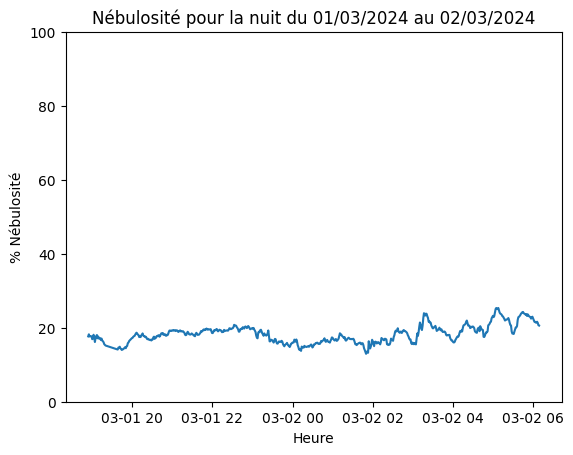

In [9]:
plt.plot(df_03_24T['DateTime'][1106:1761], def_Neb['Pourcentage'][1106:1761])
plt.title("Nébulosité pour la nuit du 01/03/2024 au 02/03/2024")
plt.xlabel('Heure')
plt.ylabel('% Nébulosité')
plt.ylim(0,100)

(0.0, 100.0)

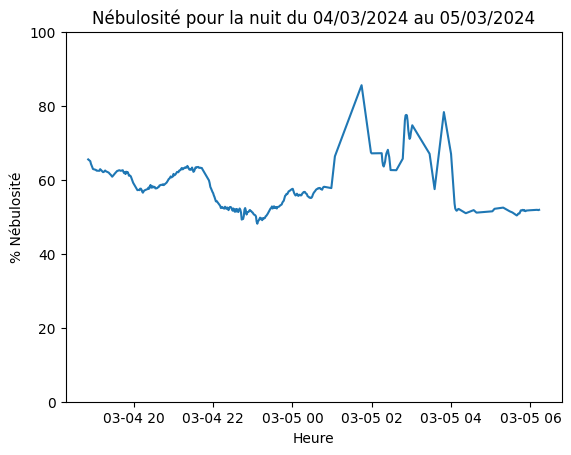

In [10]:
plt.plot(df_03_24T['DateTime'][5354:5720], def_Neb['Pourcentage'][5354:5720])
plt.title("Nébulosité pour la nuit du 04/03/2024 au 05/03/2024")
plt.xlabel('Heure')
plt.ylabel('% Nébulosité')
plt.ylim(0,100)

<h3>Test code

In [34]:
for sheet_name in calcul.sheet_names:
    df_Neb = pd.read_excel(calcul, sheet_name= "Données Tess Nuit 03-24")
    
    df_Neb['DateTime'] = pd.to_datetime(df_Neb['day_datetime'] + ' ' + df_Neb['hour_str'], dayfirst=True)
    Pourcentage = df_Neb['Pourcentage']
    
    plt.plot(df_Neb['hour'], Pourcentage)

NameError: name 'calcul' is not defined

In [77]:
# exemple: représentation de l'évolution mensuelle de la température 
STANDARD_NAME = "surface_downwelling_shortwave_flux_in_air"

# Searching for variable by standard name
varname = next((name for name, var in ncfile.variables.items() if hasattr(var, 'standard_name') and var.standard_name == STANDARD_NAME), None)

if not varname:
    print(f"Error: Unable to find variable with standard name '{STANDARD_NAME}' in file: {url}")
    ncfile.close()
    sys.exit(1)

# Extracting parameters
latitude = ncfile.variables['latitude'][:]
longitude = ncfile.variables['longitude'][:]
altitude = ncfile.variables['altitude'][:]

# Extracting time
time_unix = ncfile.variables['time'][:]
var_array = np.array(ncfile.variables[varname][:])

# Converting time to human-readable format
time_array = np.array([datetime.fromtimestamp(t) for t in time_unix])

# Set figure parameters
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0.01

# Plotting the parameter against time
plt.plot(time_array, var_array)
plt.xlabel('Time [UTC]')
plt.ylabel(f"{ncfile.variables[varname].long_name} ({ncfile.variables[varname].units})")
plt.title(f"{varname} for {params['STATION']} - {params['YEAR']}/{params['MONTH']}")
plt.show()

NameError: name 'ncfile' is not defined

<Axes: >

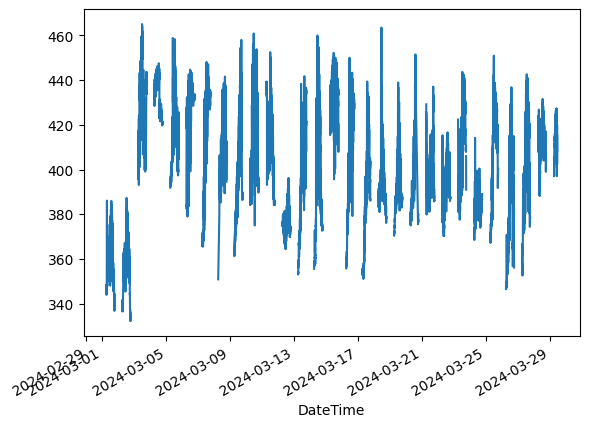

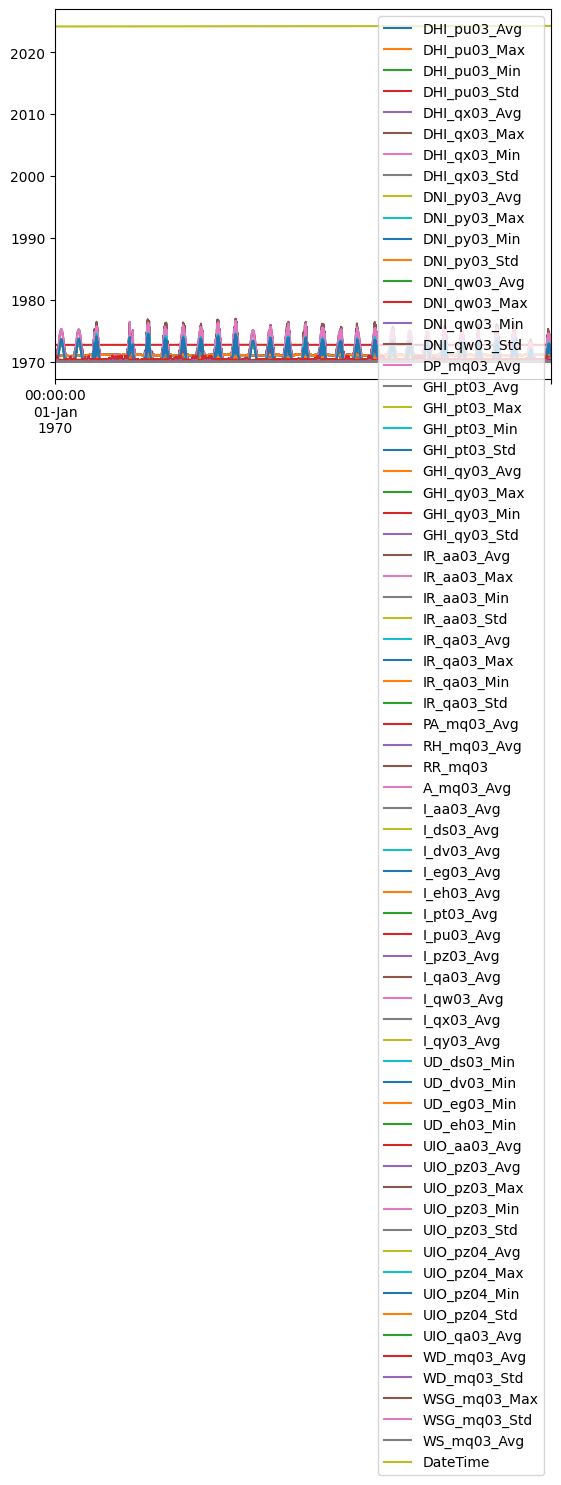

In [59]:
df_03_24T.index = pd.to_datetime(df_03_24T['DateTime'])
df_03_24T

d_test = (5.670374*10**-8)*((df_03_24T['tsky nuit']+273)**4)
d_test.plot()

df_03_24

df_03_24.plot()

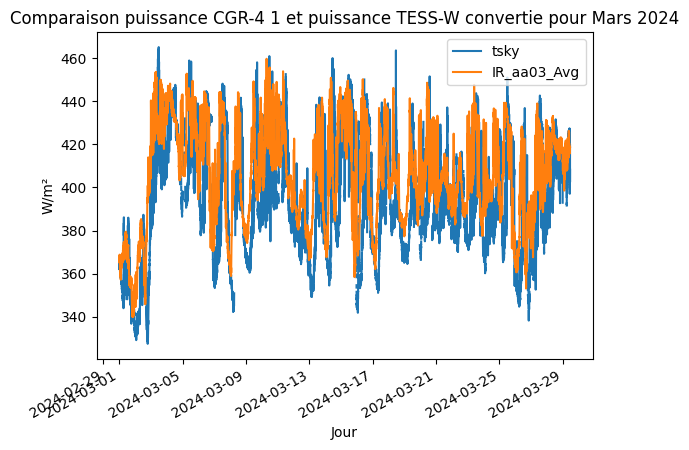

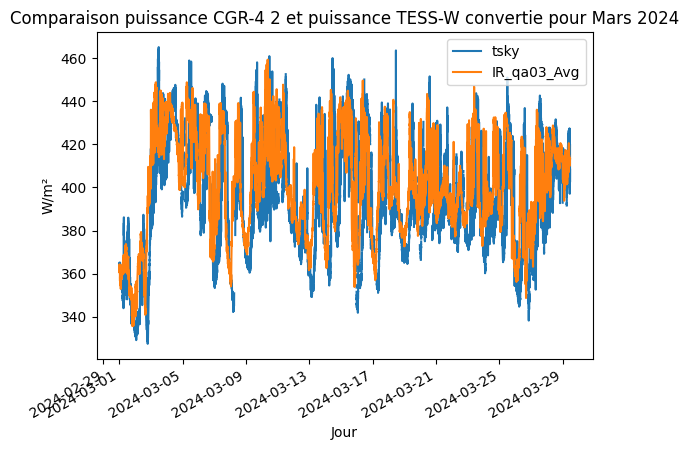

In [20]:
dfT_C['DateTime'] = pd.to_datetime(dfT_C['day'] + ' ' + dfT_C['hour'],  dayfirst = True)
dfT_C.set_index(dfT_C['DateTime'], inplace = True)
P = 5.670374*10**-8*(dfT_C['tsky']+273)**4
P.plot()
dfT_C['IR_aa03_Avg'].plot()
plt.title('Comparaison puissance CGR-4 1 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()
plt.show()

P.plot()
dfT_C['IR_qa03_Avg'].plot()
plt.title('Comparaison puissance CGR-4 2 et puissance TESS-W convertie pour Mars 2024')
plt.xlabel('Jour')
plt.ylabel('W/m²')
plt.legend()
plt.show()


In [ ]:
df_03_24T['DateTime_clean'] = pd.to_datetime(df_03_24T['day'] + ' ' + df_03_24T['hour_clean'], dayfirst = True)
# Créer la colonne 'hour_clean' au format hh:mm:ss

# Utiliser 'hour_clean' comme index
df_03_24T.set_index(df_03_24T['DateTime_clean'], inplace=True)

# Vérifier la différence entre l'index et la colonne 'hour'
# Si une différence est trouvée, ajouter une ligne avec des NaN
if not df_03_24T.index.equals(df_03_24T['hour']):
    # Trouver les valeurs manquantes dans l'index
    missing_values = df_03_24T['hour'][~df_03_24T['hour'].isin(df_03_24T.index)]
    
    for missing_value in missing_values:
        # Créer une nouvelle ligne avec des NaN
        new_row = df_03_24T(index=[missing_value.strftime('%H:%M:%S')], columns=df_03_24T.columns)
        df_03_24T = pd.concat([df_03_24T, new_row])